## TensorFlowでMNISTのデータセットを画像認識

tensorflow 2.xを使う

In [1]:
%tensorflow_version 2.x

ライブラリをインポート

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

データの読み込み

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((len(train_images), 784)).astype("float32") / 255
test_images = test_images.reshape((len(test_images), 784)).astype("float32") / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11501568/11490434 [==============================] - 0s 0us/step


ニューラルネットワークの定義

In [13]:
model = models.Sequential()

model.add(layers.Reshape((28, 28, 1), 
          input_shape = (28 * 28,), 
          name = "reshape"))
model.add(layers.Conv2D(32, 
                        (5, 5), 
                        padding = "same", 
                        kernel_initializer = initializers.TruncatedNormal(), 
                        use_bias = True, 
                        activation = "relu", 
                        name = "conv_filter1"))
model.add(layers.MaxPooling2D((2, 2),
                              name = "max_pooling1"))
model.add(layers.Conv2D(64,
                        (5,5),
                        padding = "same",
                        kernel_initializer = initializers.TruncatedNormal(),
                        use_bias = True,
                        activation = "relu",
                        name = "conv_filter2"))
model.add(layers.MaxPooling2D((2, 2),
                              name = "max_pooling2"))
model.add(layers.Flatten(name = "flatten"))
model.add(layers.Dense(1024, 
                       activation = "relu",
                       kernel_initializer = initializers.TruncatedNormal(),
                       name = "hidden"))
model.add(layers.Dropout(rate = 0.5, 
                         name = "dropout"))
model.add(layers.Dense(10, 
                       activation = "softmax",
                       name = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter1 (Conv2D)        (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 14, 14, 32)        0         
_________________________________________________________________
conv_filter2 (Conv2D)        (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
hidden (Dense)               (None, 1024)             

コンパイル

In [21]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ["acc"])

学習

In [22]:
history = model.fit(train_images, 
                    train_labels,
                    validation_data = (test_images, test_labels),
                    batch_size = 128,
                    epochs = 10)

Epoch 1/10
469/469 [==============================] - 180s 382ms/step - loss: 0.1496 - acc: 0.9537 - val_loss: 0.0538 - val_acc: 0.9830
Epoch 2/10
469/469 [==============================] - 178s 379ms/step - loss: 0.0457 - acc: 0.9859 - val_loss: 0.0309 - val_acc: 0.9905
Epoch 3/10
469/469 [==============================] - 177s 377ms/step - loss: 0.0311 - acc: 0.9905 - val_loss: 0.0255 - val_acc: 0.9908
Epoch 4/10
469/469 [==============================] - 175s 373ms/step - loss: 0.0236 - acc: 0.9930 - val_loss: 0.0239 - val_acc: 0.9919
Epoch 5/10
469/469 [==============================] - 174s 371ms/step - loss: 0.0170 - acc: 0.9944 - val_loss: 0.0228 - val_acc: 0.9928
Epoch 6/10
469/469 [==============================] - 175s 374ms/step - loss: 0.0148 - acc: 0.9952 - val_loss: 0.0288 - val_acc: 0.9909
Epoch 7/10
469/469 [==============================] - 175s 373ms/step - loss: 0.0135 - acc: 0.9958 - val_loss: 0.0219 - val_acc: 0.9936
Epoch 8/10
469/469 [============================

学習結果

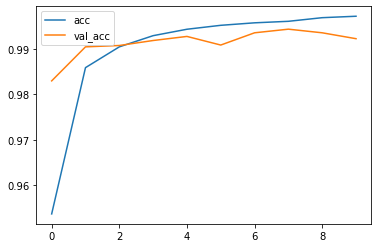

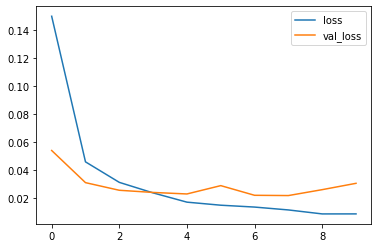

In [24]:
DataFrame({"acc": history.history["acc"],
           "val_acc": history.history["val_acc"]}).plot()
DataFrame({"loss": history.history["loss"],
           "val_loss": history.history["val_loss"]}).plot()

先頭の30個の結果(predict/answer)


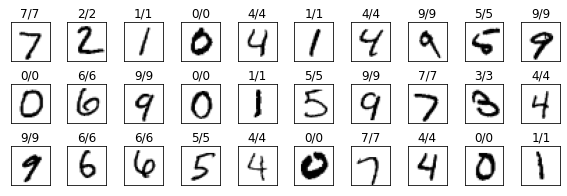

In [54]:
print("先頭の30個の結果(predict/answer)")

out_put = model.predict(test_images[:30])
fig1 = plt.figure(figsize = (10, 3))
for i in range(3):
  for j in range(10):
    subplot = fig1.add_subplot(3, 10, 10 * i + j + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    pre = np.argmax(out_put[10 * i + j])
    ans = np.argmax(test_labels[10 * i + j])
    subplot.set_title("{}/{}".format(pre, ans))
    plt.subplots_adjust(hspace = 0.6)
    subplot.imshow(test_images[10 * i + j].reshape((28, 28)),
                   vmin = 0, vmax = 1, cmap = plt.cm.gray_r)

間違った予測の例(predict/answer)


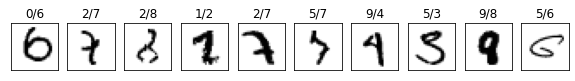

In [58]:
print("間違った予測の例(predict/answer)")

fig2 = plt.figure(figsize = (10, 1))
wrong = 0
i = 0
out_put = model.predict(test_images[:1100])
while wrong < 10:
  pre = np.argmax(out_put[i])
  ans = np.argmax(test_labels[i])
  if pre != ans:
    subplot = fig2.add_subplot(1, 10, wrong + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title("{}/{}".format(pre, ans))
    plt.subplots_adjust(hspace = 0.6)
    subplot.imshow(test_images[i].reshape((28, 28)),
                  vmin = 0, vmax = 1, cmap = plt.cm.gray_r)
    wrong += 1
  i += 1